In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install fiona
!pip install geopandas
!pip install folium
!pip install sodapy -q
!pip install adjustText
!pip install plotly --upgrade
!pip install contextily
!pip install mapclassify
!pip install chart-studio
!sudo apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 16.7 MB 175 kB/s 
     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 6.3 MB 38.3 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=15481280d8120371106e00f3f88e065799929947c9bc277bc3b37a583edeec87
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
     |████████████████████████████████| 28.8 MB 1.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 19.3 MB 344 kB/s 
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=cd1e12a939b2b9e34f8dadd8ce14587ff9cd4a2289898e0b59baa83f68b0c4aa
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d

In [3]:
!pip install tflite_model_maker

     |████████████████████████████████| 616 kB 5.3 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 6.4 MB 12.4 MB/s 
     |████████████████████████████████| 596 kB 32.2 MB/s 
     |████████████████████████████████| 120 kB 37.0 MB/s 
     |████████████████████████████████| 3.4 MB 40.0 MB/s 
     |████████████████████████████████| 1.1 MB 35.0 MB/s 
     |████████████████████████████████| 1.1 MB 36.3 MB/s 
     |████████████████████████████████| 87 kB 4.1 MB/s 
     |████████████████████████████████| 237 kB 32.2 MB/s 
     |████████████████████████████████| 1.2 MB 37.3 MB/s 
     |████████████████████████████████| 840 kB 18.2 MB/s 
     |████████████████████████████████| 25.3 MB 32.2 MB/s 
     |████████████████████████████████| 47.8 MB 36 kB/s 
     |████████████████████████████████| 352 kB 31.6 MB/s 
     |████████████████████████████████| 99 kB 4.6 MB/s 
     |████████████████████████████████| 462 kB 31.6 MB/s 
     |███████████████

In [4]:
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np

# Load a required package 
# This is a library for accessing and parsing data through URLs
from urllib.parse import urlencode
import urllib.request, json 
from bs4 import BeautifulSoup # for web scraping
import fiona
import folium
import geopandas as gpd
import adjustText as aT
import seaborn as sns # visualization styling package
import plotly.graph_objects as go
import urllib, json
import chart_studio.plotly as py
import chart_studio.tools as tls
import os
from sodapy import Socrata
from IPython.display import Image, display
from shapely.geometry import Polygon
import time
from shapely.geometry import shape
import contextily as ctx
import pickle

# A magic functin that renders the figure in a notebook 
%matplotlib inline 

import matplotlib.pyplot as plt
import os
import tensorflow as tf
assert tf.__version__.startswith('2')
import tflite_model_maker
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib
from shapely.geometry import Point

from google.colab import files

In [5]:
import folium
from folium.plugins import HeatMap

In [6]:
!pip install pygeos
!sudo apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 2.1 MB 5.4 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [7]:
input_data = {'city':['Ann Arbor', 'Boulder', 'Chicago', 'DC', 'NYC', 'SF','Madison','Tulsa','Seattle'],
        'data_type':['Training','Training','Training','Training','Training','Training','Testing','Testing','Testing']}
input_df = pd.DataFrame(input_data)
input_df

,city,data_type
0,Ann Arbor,Training
1,Boulder,Training
2,Chicago,Training
3,DC,Training
4,NYC,Training
5,SF,Training
6,Madison,Testing
7,Tulsa,Testing
8,Seattle,Testing


In [8]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(640, 384, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_model(num_classes=10)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 382, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 319, 191, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 189, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 158, 94, 16)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 92, 32)       4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 78, 46, 32)       0

# For Regular Map Images

In [10]:
IMAGE_SHAPE = (640, 384)
TRAIN_DATA_DIR = '/content/gdrive/MyDrive/Columbia/2 Spring 22/ML for Urban Data/ML Final/Project Files/Urban-Mobility-Index/Data/Image Analysis/Training/'
TEST_DATA_DIR = '/content/gdrive/MyDrive/Columbia/2 Spring 22/ML for Urban Data/ML Final/Project Files/Urban-Mobility-Index/Data/Image Analysis/Testing/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(     
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,                # Applying these all Data Augmentations
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

train_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    shuffle=True,
    #class_mode = 'categorical',
    target_size=IMAGE_SHAPE)

test_generator = datagen.flow_from_directory( 
    TEST_DATA_DIR,
    shuffle=False,
    #class_mode = 'categorical',
    target_size=IMAGE_SHAPE)

Found 584 images belonging to 10 classes.
Found 190 images belonging to 10 classes.


In [11]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=test_generator,
                    validation_steps= test_generator.samples // BATCH_SIZE,
                    verbose=0
                    )

acc = [element * 100 for element in history.history['accuracy']]
val_acc = [element * 100 for element in history.history['val_accuracy']]
loss = history.history['loss']
val_loss = history.history['val_loss']

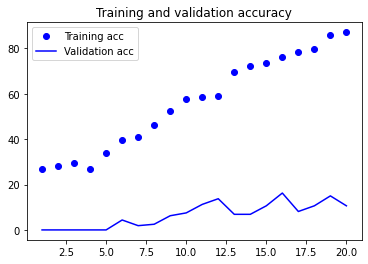

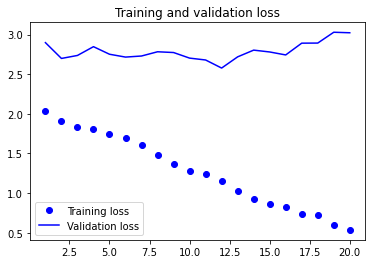

In [12]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# For Line Map Images

In [13]:
IMAGE_SHAPE = (640, 384)
TRAIN_DATA_DIR = '/content/gdrive/MyDrive/Columbia/2 Spring 22/ML for Urban Data/ML Final/Project Files/Urban-Mobility-Index/Data/Image Analysis - LINE/Training/'
TEST_DATA_DIR = '/content/gdrive/MyDrive/Columbia/2 Spring 22/ML for Urban Data/ML Final/Project Files/Urban-Mobility-Index/Data/Image Analysis - LINE/Testing/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(     
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,                # Applying these all Data Augmentations
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

train_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    shuffle=True,
    #class_mode = 'categorical',
    target_size=IMAGE_SHAPE)

test_generator = datagen.flow_from_directory( 
    TEST_DATA_DIR,
    shuffle=False,
    #class_mode = 'categorical',
    target_size=IMAGE_SHAPE)

Found 584 images belonging to 10 classes.
Found 190 images belonging to 10 classes.


In [14]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=test_generator,
                    validation_steps= test_generator.samples // BATCH_SIZE,
                    verbose=0
                    )

acc = [element * 100 for element in history.history['accuracy']]
val_acc = [element * 100 for element in history.history['val_accuracy']]
loss = history.history['loss']
val_loss = history.history['val_loss']

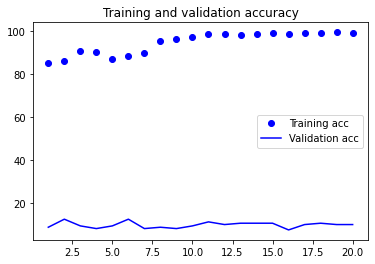

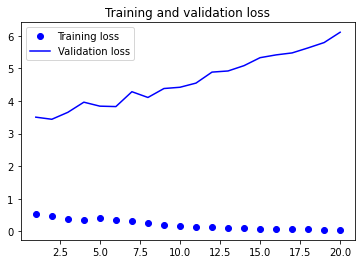

In [15]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
n = 0

for n in range(input_df.shape[0]):
  city = input_df['city'][n]
  data_type = input_df['data_type'][n]
  Intersections(city,data_type)
  n = n + 1